In [1]:
   
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from tensorflow.python.framework import ops from cnn_utils import *

from math import pi
import itertools

%matplotlib inline

with tf.Session() as sess:
    hello = tf.constant('Hello, TensorFlow!')
    print(sess.run(hello))


/Users/home/code/tensorflow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


b'Hello, TensorFlow!'


In [2]:
class Vertex:
    """a polar coordinate vertex of unit length"""
    def __init__(self, index):
        self.index = index
        self.theta = tf.get_variable("theta" + str(index), [1], initializer=tf.constant_initializer(np.random.random_sample() * pi))
        self.phi = tf.get_variable("phi" + str(index), [1], initializer=tf.constant_initializer(np.random.random_sample() * 2 * pi))
        sin_theta = tf.sin(self.theta)
        self.x = tf.multiply(sin_theta, tf.cos(self.phi) , name='x' + str(self.index))
        self.y = tf.multiply(sin_theta, tf.sin(self.phi) , name='y' + str(self.index))
        self.z = tf.cos(self.theta, name='z' + str(self.index))
        self.xyz = tf.concat([self.x, self.y, self.z], axis=0)
    
    def distSquared( vertex1, vertex2 ):
        
        return 


def make_vertextes( n_vertexes ):
    vertexes = []
    for i in range(n_vertexes):
        vertexes.append( Vertex(i) )
    return vertexes

def makePairsInverseDistance( vertexes ):
    list = []
    for pair in itertools.combinations(vertexes, 2):
        list.append( 1 / tf.norm(pair[0].xyz-pair[1].xyz))
    return tf.add_n(list)    



In [ ]:
n_vertexes = 12

tf.reset_default_graph()
verts = make_vertextes(n_vertexes)
potential = makePairsInverseDistance(verts)
optimizer = tf.train.GradientDescentOptimizer( learning_rate=1e-2 ).minimize(potential)

#print([v.xyz for v in verts])
allPositions = tf.stack([v.xyz for v in verts])

NUM_THREADS = 2
 
with tf.Session(config=tf.ConfigProto( intra_op_parallelism_threads=NUM_THREADS)) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(750):
        if(i % 10 == 0):
            _ , p = sess.run([optimizer, potential] )
            print( str(i) + ' ' + str(p) )
        else:
            sess.run( optimizer )  
         
    pos = sess.run(allPositions)    
    print(pos)
    

0 79.5678
10 52.3394
20 50.5808
30 49.9542
40 49.6788
50 49.5412
60 49.4657
70 49.421
80 49.3922
90 49.3717
100 49.3556
110 49.3415
120 49.3284
130 49.3154
140 49.3025
150 49.2894
160 49.2763
170 49.2634
180 49.2508
190 49.2389
200 49.2277
210 49.2176
220 49.2087
230 49.2009
240 49.1942
250 49.1887
260 49.1842
270 49.1805
280 49.1775
290 49.1751
300 49.1733
310 49.1718
320 49.1706
330 49.1697
340 49.1689
350 49.1683
360 49.1679
370 49.1675
380 49.1671
390 49.1669
400 49.1666
410 49.1665
420 49.1663
430 49.1662
440 49.166
450 49.1659
460 49.1659
470 49.1658
480 49.1657
490 49.1657
500 49.1656
510 49.1656
520 49.1655
530 49.1655
540 49.1655
550 49.1655
560 49.1654
570 49.1654
580 49.1654
590 49.1654


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

 
hull = ConvexHull(pos)


# https://github.com/jovyan/pythreejs
from pythreejs import *
import numpy as np
from IPython.display import display

vertices = pos

faces = hull.simplices

 
cubeGeometry = PlainGeometry(vertices=vertices, faces=faces)

myobjectCube = Mesh(geometry=cubeGeometry, material = LambertMaterial(color='#aaaaaa'))
cCube = PerspectiveCamera(position=[4, 4, 4], fov=20,
                      children=[DirectionalLight(color='#555555', position=[30, 30, 30], intensity=1.5)])
sceneCube = Scene(children=[myobjectCube, AmbientLight(color='#ffffff')])

rendererCube = Renderer(camera=cCube, background='black', background_opacity=1,
                        scene = sceneCube, controls=[OrbitControls(controlling=cCube)])

myobjectCube.material.wireframe = True

display(rendererCube)

Todo:
1. fix face normals, https://github.com/mrdoob/three.js/blob/dev/src/core/Geometry.js computeFaceNormals
cubeGeometry.faceNormals

2. edge stats bar chart
3. variable learning rate and auto termination on converge
4. seperate setup from converging loop so can run multiple if doesn't converge


## 12 Vertexes
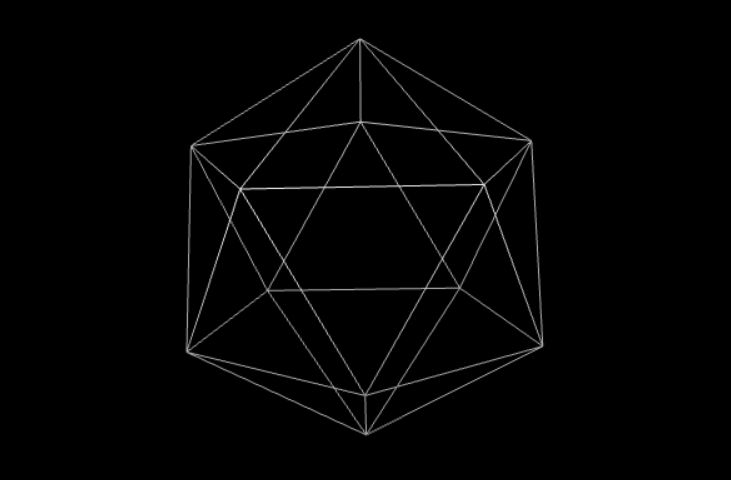


## 32 Vertexes
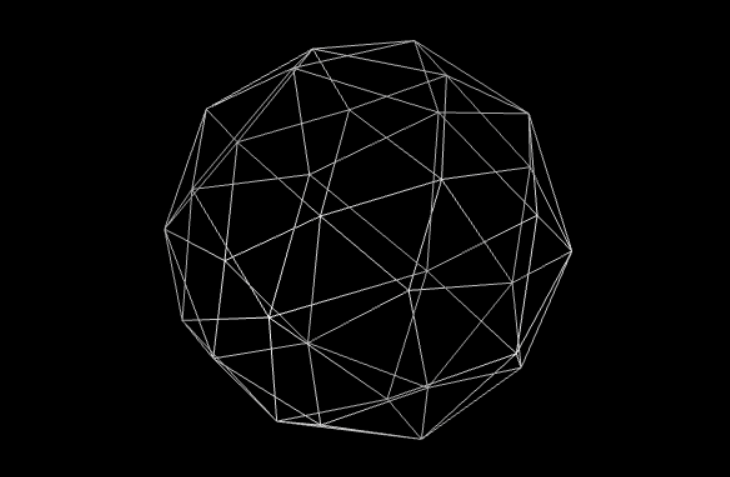
